## Delete Rows & Columns in DataFrames

### Pandas Drop Cheatsheet

Removing columns and rows from your DataFrame is not always as intuitive as it could be. It’s all about the “DataFrame drop” command. The drop function allows the removal of rows and columns from your DataFrame, and once you’ve used it a few times, you’ll have no issues.

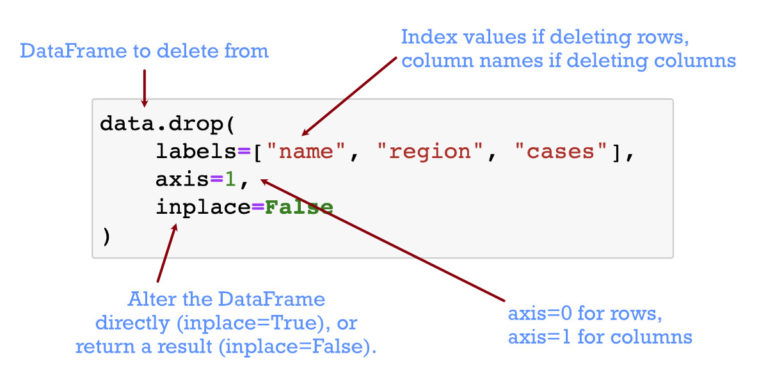

## Dropping “inplace” or returning a new DataFrame

The drop function can be used to directly alter a Pandas DataFrame that you are working with, or, alternatively, the return the result after columns or rows have been dropped. This behaviour is controlled with the “inplace” parameter. Using inplace=True can reduce the number of reassignment commands that you’ll need in your application or script. Note that if inplace is set as True, there is no return value from the drop function.

### Sample DataFrame

For this class, I will be using data from the WHO COVID tracker, downloaded as at the 1st January 2020 (data here). If you’d like to work with up-to-date data, please change the source URL for the read_csv function in the loading script to this one.

In [35]:
import pandas as pd

# Read a sample dataset (COVID data as at 1st Jan 2020)
data = pd.read_csv(
    "https://shanebucket.s3-eu-west-1.amazonaws.com/downloads/who-covid-2020-01-01.csv.zip"
)
# If you'd like to get up-to-date data, use URL: https://covid19.who.int/WHO-COVID-19-global-table-data.csv
# Rename the columns into something a little easier to work with.
data.columns = [
    "name", 
    "region", 
    "cases", 
    "cases_per_million", 
    "cases_7_days", 
    "cases_24_hours", 
    "deaths", 
    "deaths_per_million", 
    "deaths_7_days", 
    "deaths_24_hours", 
    "transmission_type"
]
data.head()

,name,region,cases,cases_per_million,cases_7_days,cases_24_hours,deaths,deaths_per_million,deaths_7_days,deaths_24_hours,transmission_type
0,Global,NaN,81947503,10497.596952,3717947,470046,1808041,231.61274,70443,9921,NaN
1,United States of America,Americas,19346790,58449.050000,1035385,0,335789,1014.46000,12262,0,Community transmission
2,India,South-East Asia,10286709,7454.110000,139864,20035,148994,107.97000,1902,256,Clusters of cases
3,Brazil,Americas,7619200,35845.040000,253683,55649,193875,912.10000,4655,1194,Community transmission
4,Russian Federation,Europe,3186336,21834.020000,193630,27039,57555,394.39000,3896,536,Clusters of cases


## Delete or Drop DataFrame Columns with Pandas Drop

### Delete columns by name

Deleting columns by name from DataFrames is easy to achieve using the drop command. There are two forms of the drop function syntax that you should be aware of, but they achieve the same result:

#### Delete column with pandas drop and axis=1

The default way to use “drop” to remove columns is to provide the column names to be deleted along with specifying the “axis” parameter to be 1.

In [16]:
# Delete a single column from the DataFrame
data1 = data.drop(labels='cases_7_days', axis=1)
print(data1.columns)
print()
# Delete multiple columns from the DataFrame
# Here - we provide a list to the drop() function
data2 = data.drop(labels=['deaths','deaths_per_million'], axis=1)
print(data2.columns)

# Note that the "labels" parameter is by default the first, so 
# the above lines can be written slightly more concisely:
data3 = data.drop(['cases', 'cases_per_million', 'cases_7_days'], axis=1)
print(data3.columns)


Index(['name', 'region', 'cases', 'cases_per_million', 'cases_24_hours',
       'deaths', 'deaths_per_million', 'deaths_7_days', 'deaths_24_hours',
       'transmission_type'],
      dtype='object')

Index(['name', 'region', 'cases', 'cases_per_million', 'cases_7_days',
       'cases_24_hours', 'deaths_7_days', 'deaths_24_hours',
       'transmission_type'],
      dtype='object')
Index(['name', 'region', 'cases_24_hours', 'deaths', 'deaths_per_million',
       'deaths_7_days', 'deaths_24_hours', 'transmission_type'],
      dtype='object')


#### Delete column with pandas drop “columns” parameter

Potentially a more intuitive way to remove columns from DataFrames is to use the normal “drop” function with the “columns” parameter specifying a single column name or a list of columns.

In [19]:
# Delete a single named column from the DataFrame
data4 = data.drop(columns=['name'])
print(data4.columns)


# Delete multiple named columns from the DataFrame
data5 = data.drop(columns=['deaths', 'deaths_per_million'])
data5.columns[3]

Index(['region', 'cases', 'cases_per_million', 'cases_7_days',
       'cases_24_hours', 'deaths', 'deaths_per_million', 'deaths_7_days',
       'deaths_24_hours', 'transmission_type'],
      dtype='object')


'cases_per_million'

#### Delete columns by column number or index

The drop function can be used to delete columns by number or position by retrieving the column name first for .drop. To get the column name, provide the column index to the Dataframe.columns object which is a list of all column names. The name is then passed to the drop function as above.

In [20]:
# Delete a column by column number
# Delete column number 4 (index number 3 in data.columns)
data6 = data.drop(columns=data.columns[3])
data6.columns

Index(['name', 'region', 'cases', 'cases_7_days', 'cases_24_hours', 'deaths',
       'deaths_per_million', 'deaths_7_days', 'deaths_24_hours',
       'transmission_type'],
      dtype='object')

***WARNING: This method can end up in multiple columns being deleted if the names of the columns are repeated (i.e. you have two columns with the same name as the one at index 3).***


## Delete DataFrame Rows with Pandas Drop

There are three different ways to delete rows from a Pandas Dataframe. Each method is useful depending on the number of rows you are deleting, and how you are identifying the rows that need to be removed.

### Deleting rows using “drop” (best for small numbers of rows)

#### Delete rows based on index value

To delete rows from a DataFrame, the drop function references the rows based on their “index values“. Most typically, this is an integer value per row, that increments from zero when you first load data into Pandas. You can see the index when you run “data.head()” on the left hand side of the tabular view. You can access the index object directly using “data.index” and the values through “data.index.values”.

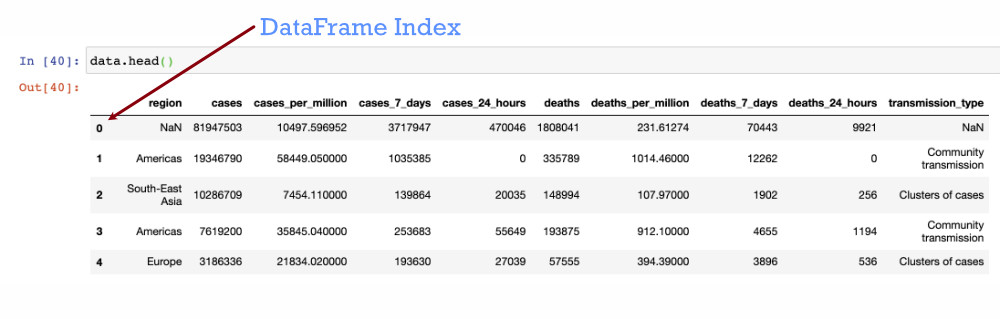

In [28]:
# delete a single row by index value 0
# data7 = data.drop(labels=0, axis=0)
# print(data7[:5])

# delete a single row by index value 1
# data8 = data.drop(labels=1, axis=0)
# print(data8[:5])

# delete a few specified rows at index values 3, 15, 20.
# Note that the index values do not always align to row numbers.
# data9 = data.drop(labels=[3,15,20], axis=0)
# print(data9)
# print()

# delete a range of rows - index values 10-20
data10 = data.drop(labels=range(40, 45), axis=0)
print(data10[:50])

# The labels parameter name can be omitted, and axis is 0 by default
# Shorter versions of the above:
data = data.drop(0)
data = data.drop([0, 15, 20])
data = data.drop(range(10,20))

                          name                 region     cases  \
1     United States of America               Americas  19346790   
2                        India        South-East Asia  10286709   
3                       Brazil               Americas   7619200   
4           Russian Federation                 Europe   3186336   
5                       France                 Europe   2576420   
6           The United Kingdom                 Europe   2488784   
7                        Italy                 Europe   2107166   
8                        Spain                 Europe   1893502   
9                      Germany                 Europe   1742661   
10                    Colombia               Americas   1626461   
11                   Argentina               Americas   1613928   
12                      Mexico               Americas   1413935   
13                      Turkey                 Europe   1394314   
14                      Poland                 Europe   130577

KeyError: '[0] not found in axis'

**It can be useful for selection and aggregation to have a more meaningful index. For our sample data, the “name” column would make a good index also, and make it easier to select country rows for deletion from the data.**

In [29]:
# Set the index of the DataFrame to the country name
data_with_index = data.set_index("name")
data_with_index.head()

,region,cases,cases_per_million,cases_7_days,cases_24_hours,deaths,deaths_per_million,deaths_7_days,deaths_24_hours,transmission_type
name,,,,,,,,,,
United States of America,Americas,19346790,58449.05,1035385,0,335789,1014.46,12262,0,Community transmission
India,South-East Asia,10286709,7454.11,139864,20035,148994,107.97,1902,256,Clusters of cases
Brazil,Americas,7619200,35845.04,253683,55649,193875,912.10,4655,1194,Community transmission
Russian Federation,Europe,3186336,21834.02,193630,27039,57555,394.39,3896,536,Clusters of cases
France,Europe,2576420,39471.14,91545,19712,64254,984.38,2362,250,Community transmission


In [30]:
# With the index, we can drop the rows for a single country with its name
data_with_index = data_with_index.drop("Brazil")
print(data_with_index[:5])

# Drop rows for multiple countries:
data_with_index1 = data_with_index.drop(["France", "Canada", "Spain"])
print(data_with_index1)

                                   region     cases  cases_per_million  \
name                                                                     
United States of America         Americas  19346790           58449.05   
India                     South-East Asia  10286709            7454.11   
Russian Federation                 Europe   3186336           21834.02   
France                             Europe   2576420           39471.14   
The United Kingdom                 Europe   2488784           36661.22   

                          cases_7_days  cases_24_hours  deaths  \
name                                                             
United States of America       1035385               0  335789   
India                           139864           20035  148994   
Russian Federation              193630           27039   57555   
France                           91545           19712   64254   
The United Kingdom              300193           55892   73512   

                  

#### Delete rows based on row number

At times, the DataFrame index may not be in ascending order. To delete a row based on it’s position in the DataFrame, i.e. “delete the second row”, we still use the index of the DataFrame, but select the row from the index directly as we delete. We can also use these index selections to delete multiple rows, or index from the bottom of the DataFrame using negative numbers. For example:

In [10]:
# Delete the 2nd row in the DataFrame (note indices starting from 0)
data = data.drop(data.index[1])

# Delete some chosen rows by row numbers - 2nd, 10th, 30th:
data = data.drop(data.index[[1, 9, 29]])

# Delete the first 5 rows
data = data.drop(data.index[range(5)])

# Delete the last row in the DataFrame
data = data.drop(data.index[-1])

## Deleting rows by truncating the DataFrame

One final way to remove rows from the DataFrame is to use Python “slice” notation. Slice notation is well summarised in this StackOverflow post:

    data[start:stop]  # items start through stop-1
    data[start:]      # items start through the rest of the DataFrame
    data[:stop]       # items from the beginning through stop-1
    data[:]           # a copy of the whole DataFrame

The slice notation makes it easy to delete many rows from a DataFrame, while retaining the selected “slice”. For example:

In [46]:
# Start with a new dataset again
# Selecting after 10 

data11 = data[:10]
print(data11)
print("----------------------------------------------------------------------------------------")

# Selecting 50 to 100
data12 = data[50:101]
print(data12)
print("----------------------------------------------------------------------------------------")

# Selecting from 100 to last
data13 = data[100:]
print(data13)

# Selecting from 50 to 100 with a jump of 2
print("----------------------------------------------------------------------------------------")
data14 = data[50:100:2]
print(data14)


                       name           region     cases  cases_per_million  \
0                    Global              NaN  81947503       10497.596952   
1  United States of America         Americas  19346790       58449.050000   
2                     India  South-East Asia  10286709        7454.110000   
3                    Brazil         Americas   7619200       35845.040000   
4        Russian Federation           Europe   3186336       21834.020000   
5                    France           Europe   2576420       39471.140000   
6        The United Kingdom           Europe   2488784       36661.220000   
7                     Italy           Europe   2107166       34851.180000   
8                     Spain           Europe   1893502       40498.580000   
9                   Germany           Europe   1742661       20799.460000   

   cases_7_days  cases_24_hours   deaths  deaths_per_million  deaths_7_days  \
0       3717947          470046  1808041           231.61274          704